# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Apply seaborn styles to the plots
sns.set()

In [ ]:
data_paid_0_2021 = pd.read_csv('/content/drive/MyDrive/minutes_watched_2021_paid_0.csv')
data_paid_1_2021 = pd.read_csv('/content/drive/MyDrive/minutes_watched_2021_paid_1.csv')
data_paid_0_2022 = pd.read_csv('/content/drive/MyDrive/minutes_watched_2022_paid_0.csv')
data_paid_1_2022 = pd.read_csv('/content/drive/MyDrive/minutes_watched_2022_paid_1.csv')
data_cert = pd.read_csv('/content/drive/MyDrive/minutes_and_certificates.csv')

# Plot the distributions

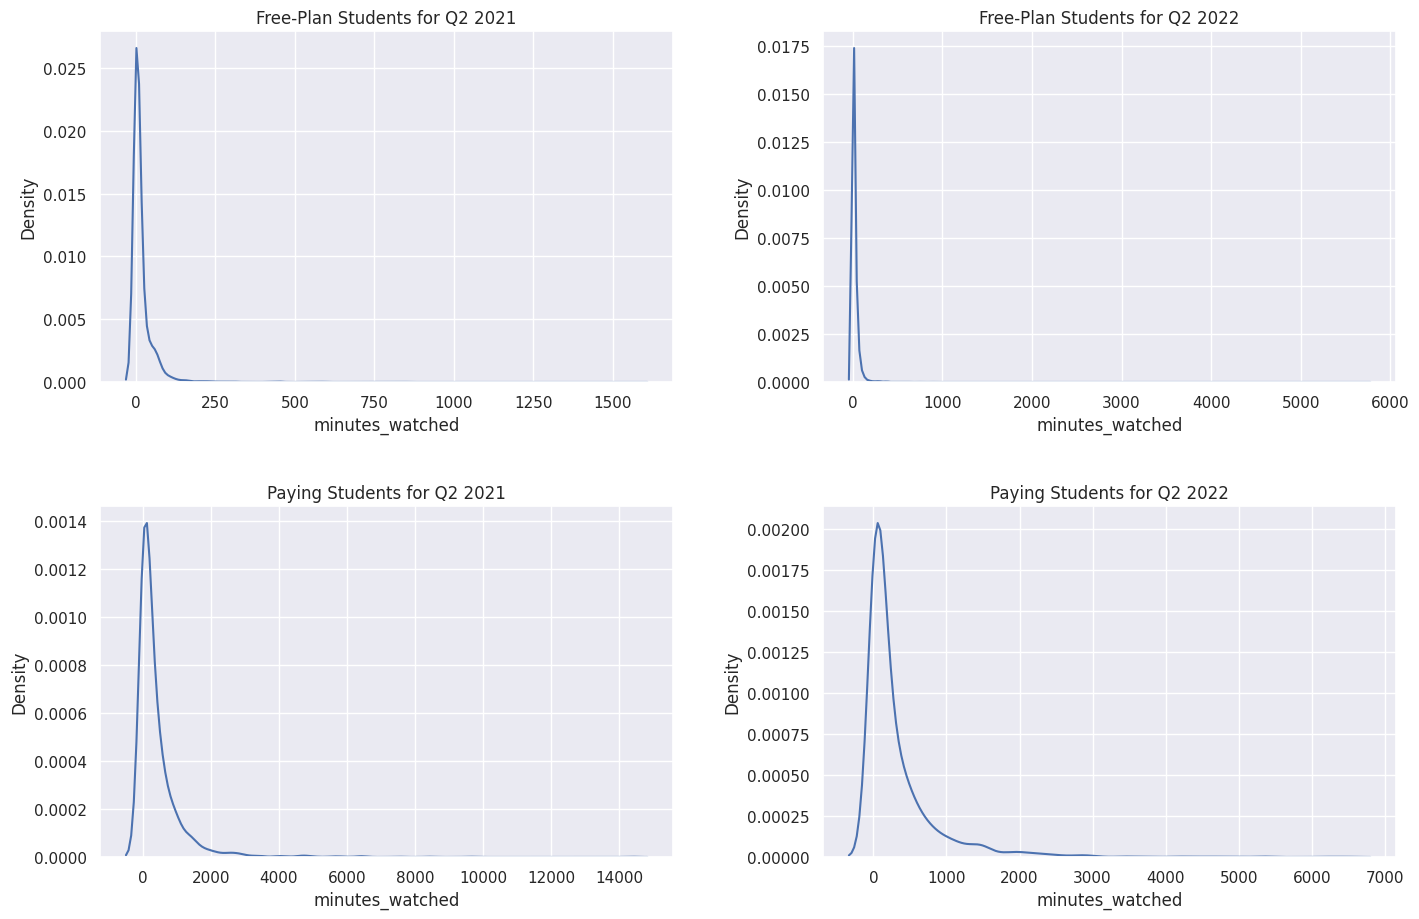

In [ ]:
# Create a 2x2 grid of plots comparing minutes watched for free vs. paying students in Q2 2021 and Q2 2022
fig, axes = plt.subplots(2, 2, figsize =(15,10))

# Plot data using kernel density estimation (KDE)
# The "ax" parameter is used to define which subplot or "axis" the plot should be drawn onto.
sns.kdeplot(data_paid_0_2021['minutes_watched'], ax = axes[0, 0]).set(title = 'Free-Plan Students for Q2 2021')
sns.kdeplot(data_paid_0_2022['minutes_watched'], ax = axes[0, 1]).set(title = 'Free-Plan Students for Q2 2022')
sns.kdeplot(data_paid_1_2021['minutes_watched'], ax = axes[1, 0]).set(title = 'Paying Students for Q2 2021')
sns.kdeplot(data_paid_1_2022['minutes_watched'], ax = axes[1, 1]).set(title = 'Paying Students for Q2 2022')

fig.tight_layout(pad = 3.0)

plt.show()

# Remove the outliers

In [ ]:
# Remove outliers by keeping only the data below the 99th percentile
q1 = data_paid_0_2021['minutes_watched'].quantile(0.99)

# With the help of conditional filtering, we can remove outliers based on quantile values.

# "data_paid_0_2021['minutes_watched']<q1" creates a boolean mask. For each row in "data_paid_0_2021"  it checks
# if the value in the "minutes_watched" column is less than the 99th percentile value.
# This mask will return True for all the rows where 'minutes_watched' is less than the 99th
# percentile and False otherwise.

# "data_paid_0_2021[data_paid_0_2021['minutes_watched']<q1]" filters the data_paid_0_2021 dataframe using the boolean mask created
# in the previous step. Only rows where the condition is True will be retained.
data_no_outliers1 = data_paid_0_2021[data_paid_0_2021['minutes_watched']<q1]

q2 = data_paid_1_2021['minutes_watched'].quantile(0.99)
data_no_outliers2 = data_paid_1_2021[data_paid_1_2021['minutes_watched']<q2]

q3 = data_paid_0_2022['minutes_watched'].quantile(0.99)
data_no_outliers3 = data_paid_0_2022[data_paid_0_2022['minutes_watched']<q3]

q4 = data_paid_1_2022['minutes_watched'].quantile(0.99)
data_no_outliers4 = data_paid_1_2022[data_paid_1_2022['minutes_watched']<q4]

# Plot the distributions (without outliers)

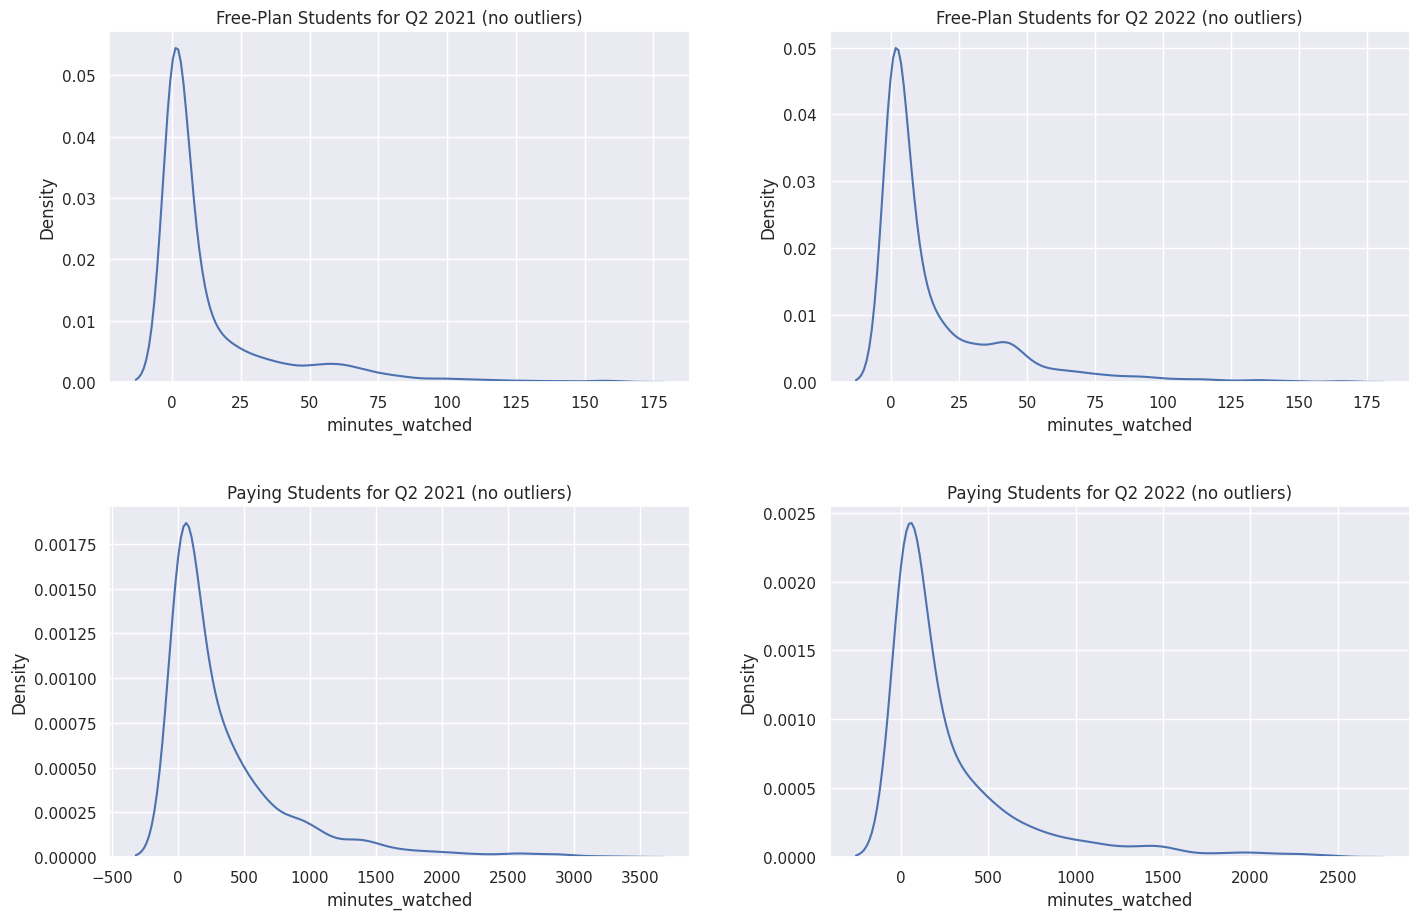

In [ ]:
# Create a 2x2 grid of plots for the data without outliers
fig, axes = plt.subplots(2, 2, figsize =(15,10))

# Plot data without outliers using KDE
sns.kdeplot(data_no_outliers1['minutes_watched'],
            ax = axes[0, 0]).set(title = 'Free-Plan Students for Q2 2021 (no outliers)')
sns.kdeplot(data_no_outliers3['minutes_watched'],
            ax = axes[0, 1]).set(title = 'Free-Plan Students for Q2 2022 (no outliers)')
sns.kdeplot(data_no_outliers2['minutes_watched'],
            ax = axes[1, 0]).set(title = 'Paying Students for Q2 2021 (no outliers)')
sns.kdeplot(data_no_outliers4['minutes_watched'],
            ax = axes[1, 1]).set(title = 'Paying Students for Q2 2022 (no outliers)')

# Adjust layout for better visualization
fig.tight_layout(pad = 3.0)

plt.show()

# Save to .csv file

In [ ]:
# Uncomment either of the following lines to save the cleaned data without outliers to a new CSV file

data_no_outliers1.to_csv('/content/drive/MyDrive/minutes_watched_2021_paid_0_no_outliers.csv',index=False)
data_no_outliers3.to_csv('/content/drive/MyDrive/minutes_watched_2022_paid_0_no_outliers.csv',index=False)
data_no_outliers2.to_csv('/content/drive/MyDrive/minutes_watched_2021_paid_1_no_outliers.csv',index=False)
data_no_outliers4.to_csv('/content/drive/MyDrive/minutes_watched_2022_paid_1_no_outliers.csv',index=False)

In [ ]:
# Create a copy of the raw data to avoid modifying the original DataFrame
data = data_cert.copy()

# Display the first few rows of the dataset
data.head()

,student_id,certificates_issued,minutes_watched
0,6,1,148.12
1,182,7,2018.87
2,801,13,6066.00
3,841,3,1623.63
4,862,1,1145.65


In [ ]:
# Define the target variable (dependent variable) and inputs (independent variable)
target = data['certificates_issued']
inputs = data['minutes_watched']

## Splitting the data into training and test sets

In [ ]:
# Split the dataset into training and test sets (80% training, 20% test)
x_train, x_test, y_train, y_test = train_test_split(inputs,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=365)

# Convert the data series into numpy arrays for compatibility with scikit-learn
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Reshape the training data to fit the model (necessary for a single feature input)
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

## Creating the model and fitting it to the data

In [ ]:
# Initialize the Linear Regression model
reg = LinearRegression()

# Train the model on the training data
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Print the intercept and coefficient of the regression
reg.intercept_, reg.coef_

(np.float64(1.2110813547761305), array([0.00168917]))

## Calculating the R-squared value

In [ ]:
# Print the R-squared value of the regression
reg.score(x_train, y_train)

0.22183418741245453

## Making predictions

In [ ]:
# Make predictions on the test data
y_hat_test = reg.predict(x_test)

In [ ]:
# Predict the number of certificates issued for 1200 minutes watched
reg.predict([[1200]])

array([3.23809089])

## Plotting the results

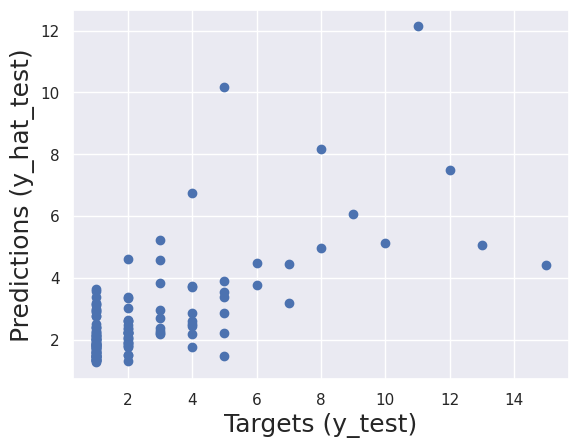

In [ ]:
# Plot the actual test values against the predicted values
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()